# MULTIPLE LINEAR REGRESSION

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


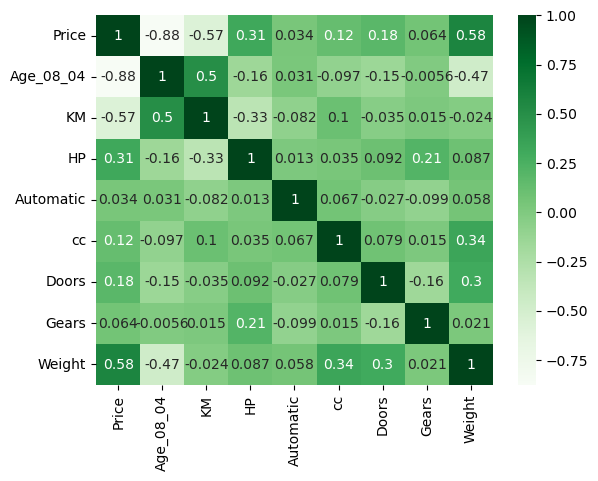

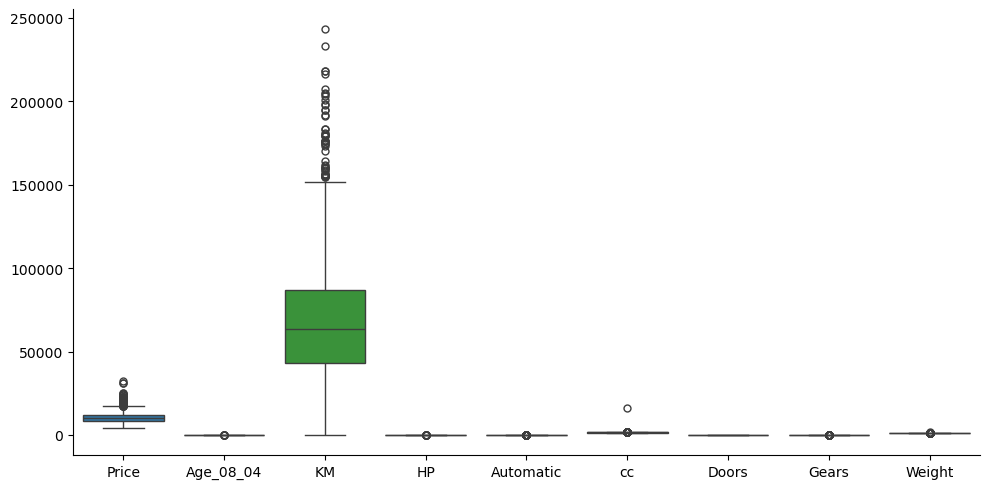

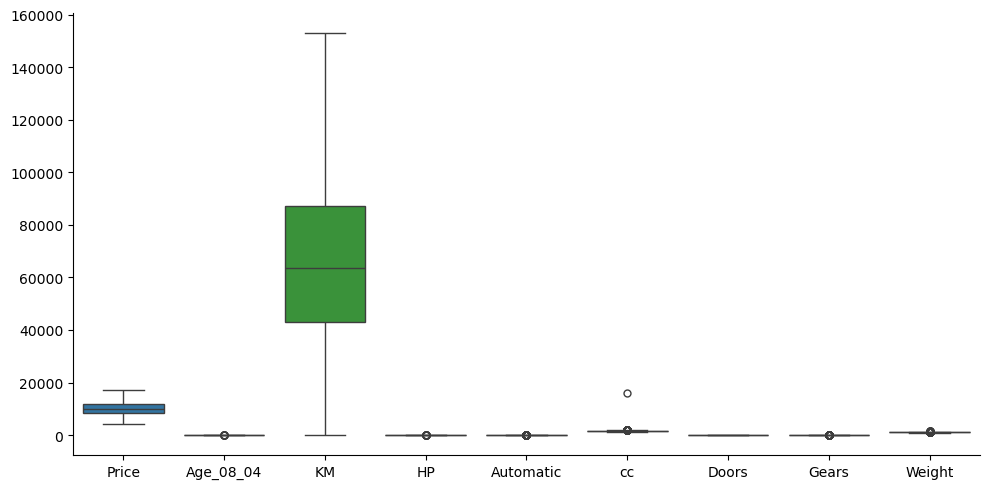

By Linear Regression model (Traing data)
MSE=1376889.59
R^2=0.84
RMSE=1173.41 
By Linear Regression model (Testing data)
MSE=1366971.02
R^2=0.85
RMSE=1169.18 
----------------------------------------------------------------------------------------------------
By LASSO Regression model (Training data)
MSE=1378288.08
R^2=0.85
RMSE=1174.01 
By LASSO Regression model (Testing data)
MSE=1354883.29
R^2=0.85
RMSE=1163.99 
----------------------------------------------------------------------------------------------------
By Ridge Regression model (Training data)
MSE=1378274.20
R^2=0.84
RMSE=1174.00 
By Ridge Regression model (Testing data)
MSE=1354705.72
R^2=0.85
RMSE=1163.92 
----------------------------------------------------------------------------------------------------


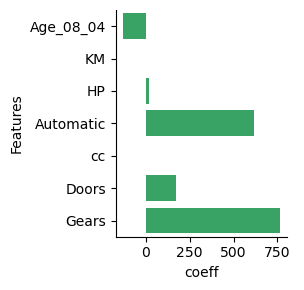

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# import dataset
toyota_cor=pd.read_csv('ToyotaCorolla - MLR.csv')
toyota_cor.head()
# Evaluate DataSet
toyota_cor.info()
toyota_cor.describe()
toyota_cor.isnull().sum()
dup=toyota_cor[toyota_cor.duplicated()]
dup
toyota_cor.drop_duplicates(inplace=True)
toyota_cor['Cylinders'].nunique()
toyota_cor.drop('Cylinders',axis=1,inplace=True)
toyota_cor['Fuel_Type']=toyota_cor['Fuel_Type'].astype('category')
car=toyota_cor.copy()
car.drop('Fuel_Type',axis=1,inplace=True)
# Plot co-Relation by heat map
cor=car.corr()
sns.heatmap(cor,cmap='Greens',annot=True)
plt.show()
# Ploting box for filtering outliers
sns.catplot(toyota_cor,kind='box',height=5,aspect=2)
plt.show()
# Removing outlier from dataset
Q1=toyota_cor['KM'].quantile(0.25)
Q3=toyota_cor['KM'].quantile(0.75)
IQR=Q3-Q1
Ulimit=Q3+1.5*IQR
Llimit=Q1-1.5*IQR
toyota_cor['KM']=toyota_cor['KM'].apply(lambda x: Ulimit if Ulimit < x else x)

Q1=toyota_cor['Price'].quantile(0.25)
Q3=toyota_cor['Price'].quantile(0.75)
IQR=Q3-Q1
Ulimit=Q3+1.5*IQR
Llimit=Q1-1.5*IQR
toyota_cor['Price']=toyota_cor['Price'].apply(lambda x: Ulimit if Ulimit < x else x)
toyota_cor.drop('Fuel_Type',axis=1,inplace=True)
# Box Plot after removal of major Outliers
sns.catplot(toyota_cor,kind='box',height=5,aspect=2)
plt.show()
# Spliting data into X and y
from sklearn.model_selection import train_test_split
X=toyota_cor.iloc[:,1:-1]
y=toyota_cor.iloc[:,0]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
X_train.shape,X_test.shape,y_train.shape,y_test.shape
# Performing Regression by LinearRegression
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)
yhat_train=model.predict(X_train)
# Metrics for evaluate performance
from sklearn.metrics import mean_squared_error,r2_score
import numpy as np
# traing data
mse=mean_squared_error(y_train,yhat_train)
rmse=np.sqrt(mse)
r2=r2_score(y_train,yhat_train)
print(f'By Linear Regression model (Traing data)\nMSE={mse:.2f}\nR^2={r2:.2f}\nRMSE={rmse:.2f} ')
# testing data
yhat_test=model.predict(X_test)
mse=mean_squared_error(y_test,yhat_test)
rmse=np.sqrt(mse)
r2=r2_score(y_test,yhat_test)
print(f'By Linear Regression model (Testing data)\nMSE={mse:.2f}\nR^2={r2:.2f}\nRMSE={rmse:.2f} ')
print('-'*100)
# ploting features and its co_efficents
feature=X.columns
coeff=model.coef_
anly=pd.DataFrame()
anly['Features']=feature
anly['coeff']=coeff
anly
# bar plot between features and coeff
sns.catplot(anly,kind='bar',x='coeff',y='Features',color='#28b463',height=3,aspect=1,)
plt.show
# Model making by Lasso and Ridge
from sklearn.linear_model import Lasso,Ridge
lasso=Lasso()
lasso.fit(X,y)
# Predicting training y values by LASSO
yhat_train=lasso.predict(X_train)
mse=mean_squared_error(y_train,yhat_train)
rmse=np.sqrt(mse)
r2=r2_score(y_test,yhat_test)
print(f'By LASSO Regression model (Training data)\nMSE={mse:.2f}\nR^2={r2:.2f}\nRMSE={rmse:.2f} ')
# Predicting testing y values by LASSO
yhat_test=lasso.predict(X_test)
mse=mean_squared_error(y_test,yhat_test)
rmse=np.sqrt(mse)
r2=r2_score(y_test,yhat_test)
print(f'By LASSO Regression model (Testing data)\nMSE={mse:.2f}\nR^2={r2:.2f}\nRMSE={rmse:.2f} ')
print('-'*100)
# Using Ridge Regression
ridge=Ridge()
ridge.fit(X,y)
# Predecting Training y values
yhat_train=ridge.predict(X_train)
mse=mean_squared_error(y_train,yhat_train)
rmse=np.sqrt(mse)
r2=r2_score(y_train,yhat_train)
print(f'By Ridge Regression model (Training data)\nMSE={mse:.2f}\nR^2={r2:.2f}\nRMSE={rmse:.2f} ')
yhat_test=ridge.predict(X_test)
mse=mean_squared_error(y_test,yhat_test)
rmse=np.sqrt(mse)
r2=r2_score(y_test,yhat_test)
print(f'By Ridge Regression model (Testing data)\nMSE={mse:.2f}\nR^2={r2:.2f}\nRMSE={rmse:.2f} ')
print('-'*100)

#### Summary:
        From the analysis of ToyotaCorolla - MLR.csv data set. I conclude that Price is taken as Label (Y value) and remaing are consideried as Features(X Values).Cylinders and Fuel type this two features were droped from data set due to One has ZERO variance other is categorical data.Corelation between the features are determined and ploted in terms of heat map.
        This data set is used to made Three different model that are Linear Regression Model, LASSO Regression Model and Ridge Regression model.And metric parameters are mentioned in output.All Model are performing well.Notabely Consider LASSO .

### Interview Questions
    1.Both Normalization and Standardization help bring data to a common scale, making it easier for machine learning models to process.
    Normalization (Min-Max Scaling)
        1.It scales all values between 0 and 1 (or sometimes -1 and 1).
        2.Think of it as squeezing data into a fixed range.
        3.Best for distance-based models like KNN and Neural Networks.
    Standardization (Z-Score Scaling)
        1.It centers the data so that the mean becomes 0 and the spread is based on standard deviation.
        2.Think of it as converting data into standard units, like converting temperature from Fahrenheit to Celsius.
        3.Best for regression models, PCA, and algorithms that assume normally distributed data.

    2.Multicollinearity occurs when two or more independent variables in a multiple linear regression model are highly correlated.                              This makes it difficult to determine the individual effect of each predictor on the target variable.
    Techniques:
        1.Variance Inflation Factor (VIF)
        2.Principal Component Analysis (PCA)
        3.Feature Selection 
        4.Regularization







